
# Project: InvestigateTMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

# Dataset Description 
### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.



# Question(s) for Analysis
### Research Question 1 :-What is Most Popular Movies and TV Shows tagged with keyword?
### Research Question 2 :- How many films per each actor? and Does the more profitable actors make more popularity films?


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
# Data Wrangling






## Load the data and print out a few lines

In [3]:
df=pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# We will investigate this dataset and see the null values and try filling it 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# From df.info() we see some columns with (NaN) values The next step we try to figure out those columns 
#first we calculate the number of total entries of the data which simply # of rows * # of columns
print("The total # of entries= {}".format(df.shape[0]*df.shape[1]))
#we calculate the number of NaN
print("the total # of NaN entries= {}".format(df.isna().sum().sum()))
print("The ratio between two numbers= {}".format(100*(df.isna().sum().sum())/(df.shape[0]*df.shape[1])))
# we see that almost 6% of data is missing so we must deal with it upcoming in the data cleaning step

The total # of entries= 228186
the total # of NaN entries= 13434
The ratio between two numbers= 5.887302463779548


In [6]:
# another insight we can search for duplicates in this dataset
df.duplicated().sum()

1

In [7]:
# we see one duplicate row so let's drop it
df.drop_duplicates(inplace=True)
df.duplicated().sum()#check again for duplicates

0


# Data Cleaning

 

In [8]:
# After discussing the structure of the data and any problems that need to be cleaned, 
#we will perform those cleaning steps in  this section.
nan_columns=df.isna().any()
columns_with_nan = df.columns[nan_columns]. tolist()
print(columns_with_nan)

['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']


In [9]:
# So from the previous cell we see the NaN columns so let's see its distribution
df_nan_columns=df[columns_with_nan]
df_nan_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
imdb_id                 10855 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
genres                  10842 non-null object
production_companies    9835 non-null object
dtypes: object(9)
memory usage: 848.8+ KB


In [10]:
# From df_nan_columns.info() we can see that all the nan_columns are object so we clean them one by one 
# First we drop homepage  column as it full of NaNs
df.drop(columns="homepage",inplace=True,axis=1)

In [11]:
print("The total # of entries= {}".format(df.shape[0]*df.shape[1]))
#we calculate the number of NaN
print("the total # of NaN entries= {}".format(df.isna().sum().sum()))
print("The ratio between two numbers= {}".format(100*(df.isna().sum().sum())/(df.shape[0]*df.shape[1])))
# so we see that the nan values ratio is down to 2.5% so we will continue cleaning the data


The total # of entries= 217300
the total # of NaN entries= 5504
The ratio between two numbers= 2.532903819604234


In [12]:
df[df.columns[df.isna().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
imdb_id                 10855 non-null object
cast                    10789 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
genres                  10842 non-null object
production_companies    9835 non-null object
dtypes: object(8)
memory usage: 763.9+ KB


In [13]:
# From the preiviuos after drop "homepage" column , we can see five columns with non-null values >10750 
#so we can safely drop some of them horizontally 
df.dropna(subset=['imdb_id','cast','director','overview', 'genres'],inplace=True)
print("The total # of entries= {}".format(df.shape[0]*df.shape[1]))
#we calculate the number of NaN
print("the total # of NaN entries= {}".format(df.isna().sum().sum()))
print("The ratio between two numbers= {}".format(100*(df.isna().sum().sum())/(df.shape[0]*df.shape[1])))
# so we see that the nan values ratio is down to 2.3% so we will continue cleaning the data

The total # of entries= 214480
the total # of NaN entries= 5101
The ratio between two numbers= 2.3783103319656846


In [14]:
df[df.columns[df.isna().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10724 entries, 0 to 10865
Data columns (total 3 columns):
tagline                 7999 non-null object
keywords                9302 non-null object
production_companies    9770 non-null object
dtypes: object(3)
memory usage: 335.1+ KB


In [15]:
# remains 3 columns with nan values let's deal with  them
df["production_companies"].value_counts()

Paramount Pictures                                                                  156
Universal Pictures                                                                  133
Warner Bros.                                                                         84
Walt Disney Pictures                                                                 75
Columbia Pictures                                                                    72
                                                                                   ... 
Paramount Pictures|Bakshi Productions|Albert S. Ruddy Productions                     1
New World Pictures|Laurel Entertainment Inc.                                          1
JVC Entertainment Networks|Mystery Train                                              1
Sofica Europacorp|Canal+|CinÃ©CinÃ©ma|EuropaCorp|TF1 International                    1
Thinkfilm|Hunting Lane Films|Journeyman Pictures|Original Media|Silverwood Films      1
Name: production_companies, Leng

In [16]:
# we can fill "production_companies " with the mode value 
# -------------------------------------------------------------------------------------
# "production_companies" column NaN values before fill
print(df[df["production_companies"].isna()].head()[['id','imdb_id','popularity','production_companies']])
index_of_NaN=df[df["production_companies"].isna()].head()[['id','imdb_id','popularity','production_companies']].index

         id    imdb_id  popularity production_companies
228  300792  tt1618448    0.584363                  NaN
259  360603  tt5133572    0.476341                  NaN
295  363483  tt5133810    0.417191                  NaN
298  354220  tt3826866    0.370258                  NaN
328  308457  tt3090670    0.367617                  NaN


In [17]:
# "production_companies" column NaN values after fill
df["production_companies"].fillna(df["production_companies"].mode()[0], inplace=True)
#we see the perivious index to make sure form replace nan values
df.loc[index_of_NaN,['id','imdb_id','popularity','production_companies']]

,id,imdb_id,popularity,production_companies
228,300792,tt1618448,0.584363,Paramount Pictures
259,360603,tt5133572,0.476341,Paramount Pictures
295,363483,tt5133810,0.417191,Paramount Pictures
298,354220,tt3826866,0.370258,Paramount Pictures
328,308457,tt3090670,0.367617,Paramount Pictures


In [18]:
# we see that production_companies fill with the mode values
print("The total # of entries= {}".format(df.shape[0]*df.shape[1]))
#we calculate the number of NaN
print("the total # of NaN entries= {}".format(df.isna().sum().sum()))
print("The ratio between two numbers= {}".format(100*(df.isna().sum().sum())/(df.shape[0]*df.shape[1])))
# so we see that the nan values ratio is down to 1.9% so we will continue cleaning the data

The total # of entries= 214480
the total # of NaN entries= 4147
The ratio between two numbers= 1.9335136143230138


In [19]:
df[df.columns[df.isna().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10724 entries, 0 to 10865
Data columns (total 2 columns):
tagline     7999 non-null object
keywords    9302 non-null object
dtypes: object(2)
memory usage: 571.3+ KB


In [20]:
# finally we drop "keywords" NaN values horizontally and drop tagline vertically as it fill with NaN values
df.drop(columns="tagline",inplace=True,axis=1)
df.dropna(subset=['keywords'],inplace=True)

In [21]:
print("The total # of entries= {}".format(df.shape[0]*df.shape[1]))
#we calculate the number of NaN
print("the total # of NaN entries= {}".format(df.isna().sum().sum()))
print("The ratio between two numbers= {}".format(100*(df.isna().sum().sum())/(df.shape[0]*df.shape[1])))

The total # of entries= 176738
the total # of NaN entries= 0
The ratio between two numbers= 0.0


In [22]:
# We see that null values become zero but you don't get something for free. 
#We will see that we miss some of the data in favor of getting rid of null values. It is always a trade-off operation
print("The total # of entries after cleaning dataset= {}".format(df.shape[0]*df.shape[1]))
print("The total # of entries after cleaning dataset= {}".format(228186))
print("So we miss almost {}".format(100*(1-(176738/228186))))
# So we miss almost 22.5 % of the data which is a little big number but accepted
# -------------------------------------------------------------------------------------------------

The total # of entries after cleaning dataset= 176738
The total # of entries after cleaning dataset= 228186
So we miss almost 22.546519067778036


<a id='eda'></a>
# Exploratory Data Analysis






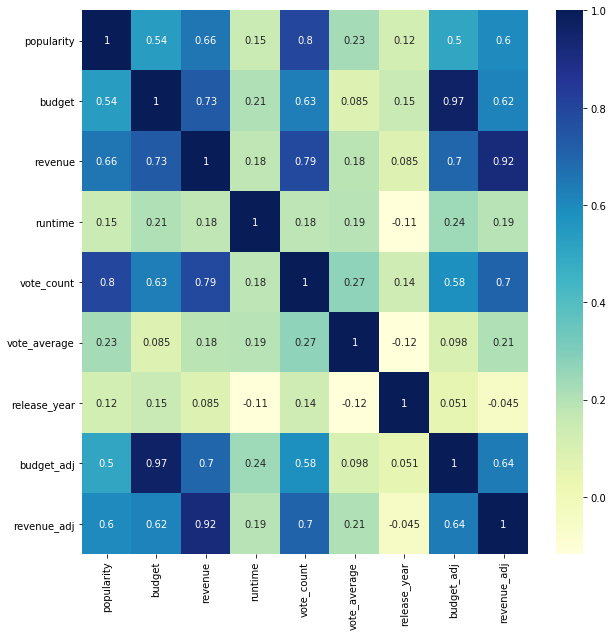

In [23]:
fig, ax = plt.subplots(figsize=(10,10)) 
dataplot = sns.heatmap(df.drop(columns=["id"],axis=1).corr(), cmap="YlGnBu", annot=True,ax=ax)

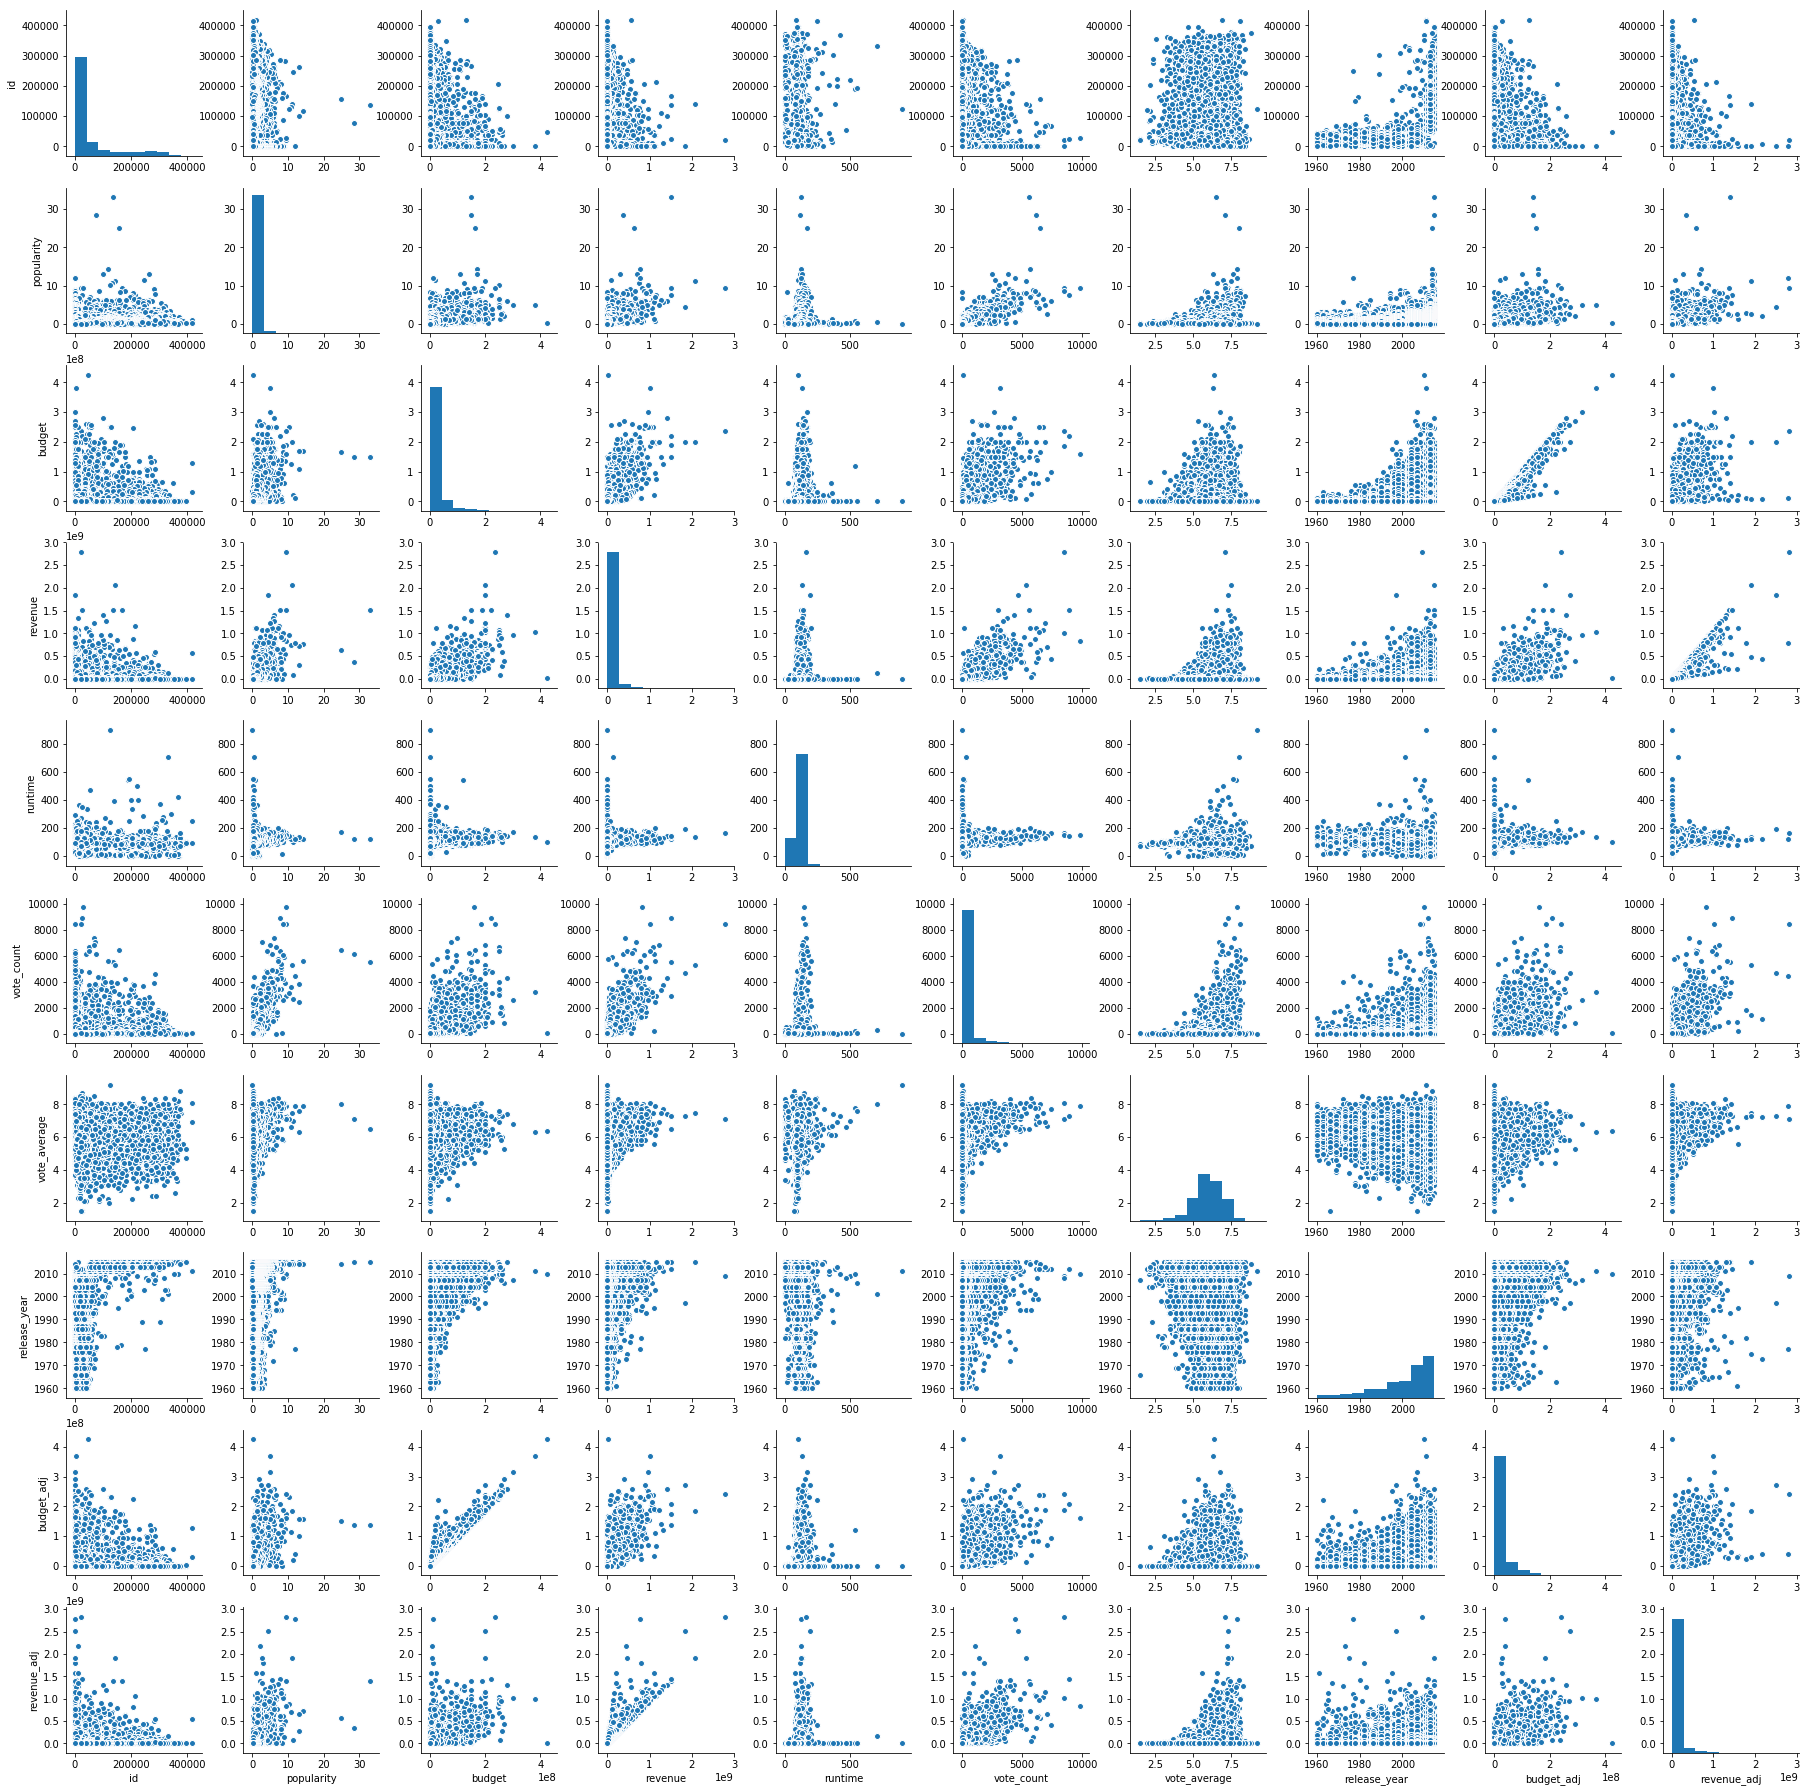

In [24]:
sns.pairplot(df)

## Research Question 1 :-What is Most Popular Movies and TV Shows tagged with keyword?

In [25]:
df_keywords=df["keywords"] 
df_keywords.head()

0    monster|dna|tyrannosaurus rex|velociraptor|island
1     future|chase|post-apocalyptic|dystopia|australia
2    based on novel|revolution|dystopia|sequel|dyst...
3                android|spaceship|jedi|space opera|3d
4                  car race|speed|revenge|suspense|car
Name: keywords, dtype: object

In [26]:
keywords={}#empty dict
for i in range (df_keywords.size):
    try:
        KeyWords_list=df_keywords[i].split(sep="|")#split the record to extract the words
        for j in (KeyWords_list):
            if j in keywords:
                keywords[j]+=1
            else:
                keywords[j]=1
    except:
        pass
#sort the dict in descending order
keywords_sorted={k: v for k, v in sorted(keywords.items(), key=lambda item: item[1],reverse = True)}
keywords_sorted=list(keywords_sorted.items())[:50] #select the first 50 item to plot them



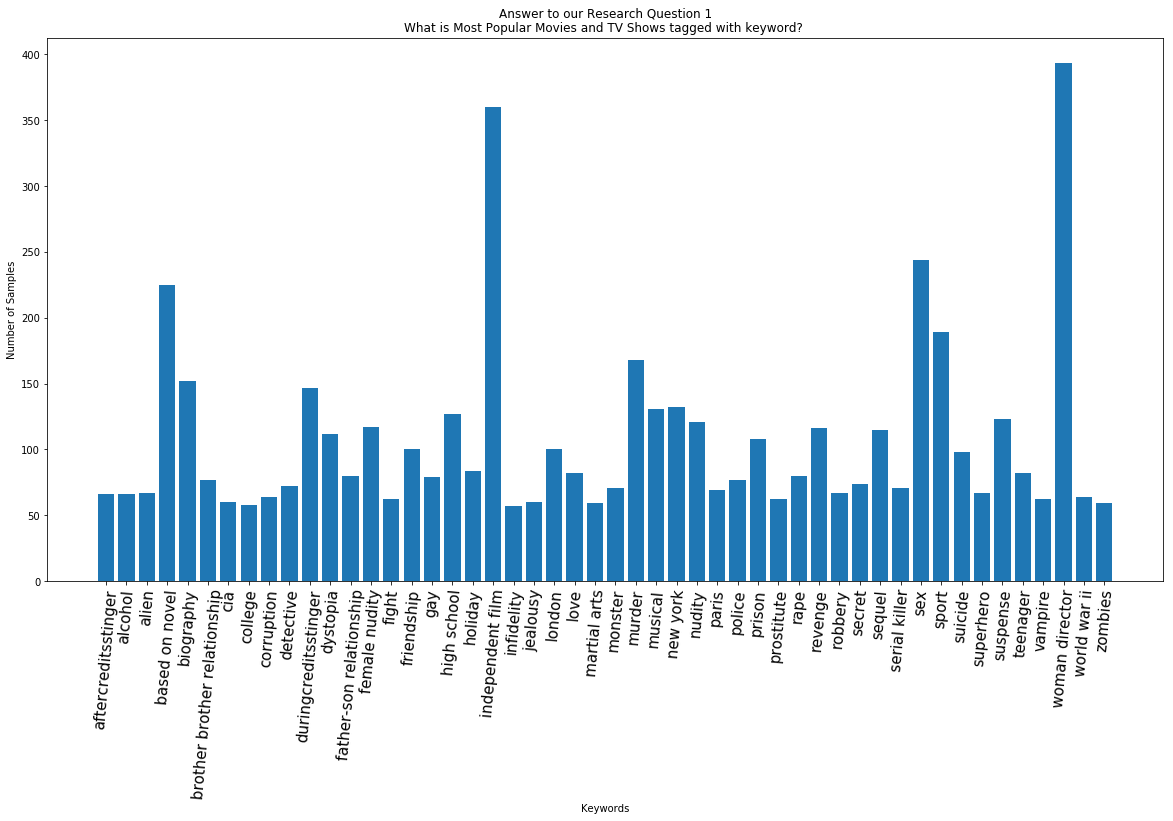

In [27]:
plt.figure(figsize=(20, 10))
DF=pd.DataFrame(keywords_sorted,columns=['keywords', 'values'])
plt.bar(DF["keywords"],DF["values"])
plt.xticks(rotation=85, fontsize=15)
plt.xlabel("Keywords")
plt.ylabel('Number of Samples')
plt.title("Answer to our Research Question 1\nWhat is Most Popular Movies and TV Shows tagged with keyword? ")
plt.show()


# Research Question 2 :- How many films per each actor? and Does the more profitable actors make more popularity films?


In [28]:
# first we will see last 25's years to see the most dominant actor of this era  
# so we will customize our dataframe from 1990 to 2015 

last_30_years=[*range(1960,1990)]
for i in last_30_years:
    df.drop(df[df["release_year"]==i].index,axis=0,inplace=True)
#adding the profit to our df
df["profit"]=df['revenue_adj']-df['budget_adj']


In [29]:
# makeing a dictionary key=the actor ,value=the number of films and sort it
df_cast=df["cast"]
cast={}#empty dict
for i in range (df_cast.size):
  try:
    cast_list=df_cast[i].split(sep="|")#split the record to extract the words
    for j in (cast_list):
        if j in cast:
           cast[j]+=1
        else:
            cast[j]=0
  except:
      pass
#sort the dict in descending order
cast_sorted={k: v for k, v in sorted(cast.items(), key=lambda item: item[1],reverse = True)}
cast_sorted=list(cast_sorted.items())[:100] #select the first 100 item to plot them


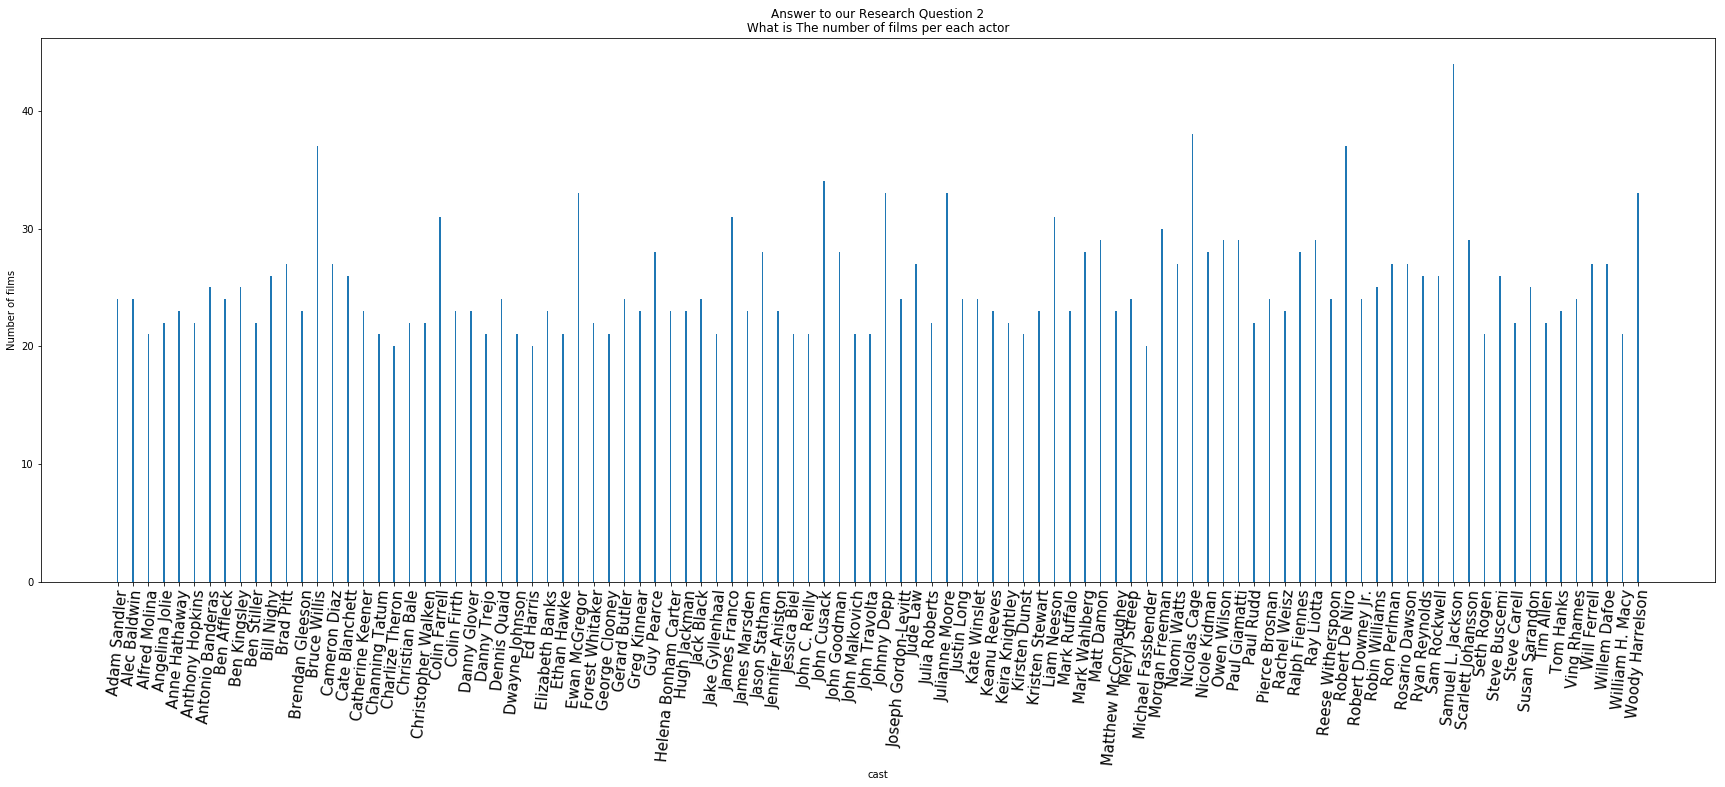

In [30]:
# ploting each actor on x-axis and the # of films on y-axis
plt.figure(figsize=(30, 10))
DF=pd.DataFrame(cast_sorted,columns=['actor', 'number of films'])
plt.bar(DF["actor"],DF["number of films"],0.1)
plt.xticks(rotation=85, fontsize=15)
plt.xlabel("cast")
plt.ylabel('Number of films')
plt.title("Answer to our Research Question 2\n What is The number of films per each actor ")
plt.show()
# from the previous figure we can see the most actor with the great number of films is 
#samual l.jackson then Nicolas Cage then Robert De Niro ,...and so on but to answer the second question which say

# Does the more films the actor does the more profit the film aquire?
# -----------------------------------------------------------------------------------------------------
# to answer this question we will plot each actor with the profit of the whole films he acted in? 

In [ ]:
actors=[]#we will put the 100 actor in actors_list
for actor in cast_sorted:
  actors.append(actor[0])
actor_profit={}#empty dict to put key=actor , value=the whole profit from all films
for actor in actors:
  actor_profit[actor]=0#to set all keys to zero for each actor and start adding
for actor in actors:
  for i in range(df["cast"].size):
      try:
        if (actor in df["cast"][i]): 
          actor_profit[actor]+=df["profit"][i]#here we check if actor in the cast of this film then we add the profit to the actor finally we get the
                                              #whole profit for each actor
      except:
        pass
#sorting it 
actor_profit_sorted={k: v for k, v in sorted(actor_profit.items(), key=lambda item: item[1],reverse = True)}
actor_profit_sorted=list(actor_profit_sorted.items())

In [ ]:
# ploting each actor on x-axis and whole profit on y-axis
plt.figure(figsize=(25, 10))
DF=pd.DataFrame(actor_profit_sorted,columns=['actor', 'profit'])
plt.bar(DF["actor"],DF["profit"],0.1)
plt.xticks(rotation=85, fontsize=15)
plt.xlabel("actors")
plt.ylabel('film profit')
plt.title("Answer to our Research Question 2\n Does the more films the actor does the more profit the film aquire? ")
plt.show()

In [ ]:
# from these previous plots we can see almost the first 20 actor with high movies number,thier films tend to attain more profit but let's dive deeper into our dataset and see .. 
#Does the prievious 100 actors make more popularity films? 
#in other word  Does the prievious 100 actors make high average rate for their films?
cast_sorted={k: v for k, v in sorted(cast.items(), key=lambda item: item[1],reverse = True)}
cast_sorted=list(cast_sorted.items())[:100]
actors=[]

for actor in cast_sorted:
  actors.append(actor[0])

popularity_actor={}
for actor in actors:
  popularity_actor[actor]={"rate":0,'count':0}  #intialize popularity_actor dict with "rate":0,'count':0
for actor in actors:
  for i in range(df["cast"].size):
      try:
        if (actor in df["cast"][i]): 
          popularity_actor[actor]["rate"]+=df['popularity'][i]#adding popularity to each actor 
          popularity_actor[actor]['count']+=1                 #count and adding 1
      except:
        pass

popularity_actor1={}
average_popularity_actor={}
for actor in actors:
  average_popularity_actor[actor]=popularity_actor[actor]['rate']/popularity_actor[actor]['count']
averag_popularity_actor_sorted={k: v for k, v in sorted(average_popularity_actor.items(), key=lambda item: item[1],reverse = True)}
averag_popularity_actor_sorted=list(averag_popularity_actor_sorted.items())

In [ ]:
# we will plot actors on the x-axis and average popularity films on y-axis
plt.figure(figsize=(25, 10))
DF=pd.DataFrame(averag_popularity_actor_sorted,columns=['actor', 'film average rate'])
plt.bar(DF["actor"],DF["film average rate"],0.1)
plt.xticks(rotation=87.5, fontsize=15)
plt.xlabel("actor")
plt.ylabel('avg popularity')
plt.title("Answer to our Research Question 2\n Does the prievious 100 actors make more popularity films? ")
plt.show()

<a id='conclusions'></a>
# Conclusions
## from our statistical analysis we see great positive correlation between revenue and budget
## as we conclude that the more money we invest the more revenue we get


## The first :-  What is Most Popular Movies and TV Shows tagged with keyword?

### and we see that woman director is the most frequent keyword 

## The second :- How many films per each actor? and Do the more profitable actors make more popularity films?

### To answer this question we plot actor vs the number of films and see that Samuel L. Jackson is the actor how to the most number of films in the past 25 year but when we plot actor vs whole profit we see that he is the seventh actor in profit list and from these plots we can see each actor and the profit of films he acted in and the number of films and we go deeper to answer the question what are the actors make high average rate for their  and see Samuel L. Jackson the twentieth in the average rate list and on this way we can know each actor to choose him in a new film

# Limitations

## Well,we investigate our dataset and see a lot of null values. We dealet with each columns with different way as the following:-

###      * We drop 'homepage' column as it full of 

###      * We saw five columns('imdb_id','cast','director','overview', 'genres') with non-null values >10750 so we can                   safely drop some of them horizontally

###      * We filled "production_companies" column with the mode value of "production_companies

###      * We drop "keywords" column's NaN values horizontally and drop 'tagline' column vertically as it fill with NaN values 
###      *To investigate the number of films per each we customize our dataset to last 25's year only





In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])